In [29]:
#Importing required applications for stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import statsmodels.api as sm

In [30]:
#Import Dataset
WL = pd.read_csv('WaterLevel.csv')
WL.head()

Date Time (GMT)  Highest  MHHW (ft)  MHW (ft)  MSL (ft)  MTL (ft)  \
0  1950/01/01      00:00    5.312        NaN     3.793     1.722     1.634   
1  1950/02/01      00:00    6.312        NaN     3.944     1.893     1.801   
2  1950/03/01      00:00    5.614        NaN     3.543     1.453     1.371   
3  1950/04/01      00:00    5.814        NaN     4.154     1.982     1.923   
4  1950/05/01      00:00    5.814        NaN     4.232     2.011     1.952   

   MLW (ft)  MLLW (ft)  Lowest (ft)  Inf  
0    -0.528        NaN       -2.188    0  
1    -0.338        NaN       -2.789    0  
2    -0.797        NaN       -3.189    0  
3    -0.308        NaN       -1.686    0  
4    -0.328        NaN       -1.388    0

In [31]:
#delete time column and Inf column as they do not offer us any additional insight
WL = WL.drop(['Time (GMT)', 'Inf'], axis=1, errors='ignore')

# Print remaining columns to verify.
print(WL.columns)

WL.head()

Index(['Date', 'Highest', 'MHHW (ft)', 'MHW (ft)', 'MSL (ft)', 'MTL (ft)',
       'MLW (ft)', 'MLLW (ft)', 'Lowest (ft)'],
      dtype='object')


Date  Highest  MHHW (ft)  MHW (ft)  MSL (ft)  MTL (ft)  MLW (ft)  \
0  1950/01/01    5.312        NaN     3.793     1.722     1.634    -0.528   
1  1950/02/01    6.312        NaN     3.944     1.893     1.801    -0.338   
2  1950/03/01    5.614        NaN     3.543     1.453     1.371    -0.797   
3  1950/04/01    5.814        NaN     4.154     1.982     1.923    -0.308   
4  1950/05/01    5.814        NaN     4.232     2.011     1.952    -0.328   

   MLLW (ft)  Lowest (ft)  
0        NaN       -2.188  
1        NaN       -2.789  
2        NaN       -3.189  
3        NaN       -1.686  
4        NaN       -1.388

In [32]:
#Change date column to reflect the date
WL['Date'] = pd.to_datetime(WL['Date'])
WL['Month'] = WL['Date'].dt.month
WL['Year'] = WL['Date'].dt.year

In [33]:
#Import temperature dataset
Temp = pd.read_csv('Temperature.csv')
Temp

Date  Temperature
0    1950/01/01         40.5
1    1950/02/01         30.3
2    1950/03/01         35.3
3    1950/04/01         47.6
4    1950/05/01         58.0
..          ...          ...
898  2024/11/01         51.4
899  2024/12/01         38.3
900  2025/01/01         31.3
901  2025/02/01         35.1
902  2025/03/01         46.9

[903 rows x 2 columns]

In [34]:
#Add Temperature Column to WL
WL['Temperature'] = Temp['Temperature']
WL

Date  Highest  MHHW (ft)  MHW (ft)  MSL (ft)  MTL (ft)  MLW (ft)  \
0   1950-01-01    5.312        NaN     3.793     1.722     1.634    -0.528   
1   1950-02-01    6.312        NaN     3.944     1.893     1.801    -0.338   
2   1950-03-01    5.614        NaN     3.543     1.453     1.371    -0.797   
3   1950-04-01    5.814        NaN     4.154     1.982     1.923    -0.308   
4   1950-05-01    5.814        NaN     4.232     2.011     1.952    -0.328   
..         ...      ...        ...       ...       ...       ...       ...   
898 2024-11-01    7.543      5.545     5.148     3.061     2.961     0.774   
899 2024-12-01    6.352      5.197     4.734     2.618     2.538     0.341   
900 2025-01-01    6.309      4.826     4.432     2.277     2.188    -0.056   
901 2025-02-01    6.739      4.964     4.537     2.434     2.379     0.220   
902 2025-03-01    6.854      5.295     5.010     2.808     2.713     0.413   

     MLLW (ft)  Lowest (ft)  Month  Year  Temperature  
0          NaN       -2.188      1  1950         40.5  
1          NaN       -2.789      2  1950         30.3  
2          NaN       -3.189      3  1950         35.3  
3          NaN       -1.686      4  1950         47.6  
4          NaN       -1.388      5  1950         58.0  
..         ...          ...    ...   ...          ...  
898      0.561       -0.351     11  2024         51.4  
899      0.072       -1.749     12  2024         38.3  
900     -0.322       -1.791      1  2025         31.3  
901     -0.112       -1.575      2  2025         35.1  
902      0.200       -1.119      3  2025         46.9  

[903 rows x 12 columns]

In [35]:
#describe the data
WL.describe()

Date     Highest   MHHW (ft)    MHW (ft)  \
count                            903  880.000000  711.000000  903.000000   
mean   1987-08-01 11:44:51.029900352    6.499650    5.146195    4.734563   
min              1950-01-01 00:00:00    5.153000    4.154000    3.543000   
25%              1968-10-16 12:00:00    6.030000    4.931000    4.491000   
50%              1987-08-01 00:00:00    6.355500    5.121000    4.724000   
75%              2006-05-16 12:00:00    6.846500    5.374000    4.964000   
max              2025-03-01 00:00:00   14.042000    6.079000    5.774000   
std                              NaN    0.704754    0.353105    0.381338   

         MSL (ft)    MTL (ft)    MLW (ft)   MLLW (ft)  Lowest (ft)  \
count  903.000000  903.000000  903.000000  711.000000   880.000000   
mean     2.548258    2.459396    0.184189    0.046986    -1.354528   
min      1.453000    1.371000   -0.827000   -1.148000    -4.287000   
25%      2.303000    2.214500   -0.056000   -0.197000    -1.810500   
50%      2.533000    2.444000    0.174000    0.062000    -1.188000   
75%      2.779000    2.684000    0.405500    0.282000    -0.800000   
max      3.612000    3.519000    1.302000    1.109000     0.292000   
std      0.366945    0.363380    0.360345    0.367015     0.763316   

            Month         Year  Temperature  
count  903.000000   903.000000   903.000000  
mean     6.485050  1987.126246    54.419712  
min      1.000000  1950.000000   -99.000000  
25%      3.000000  1968.000000    40.100000  
50%      6.000000  1987.000000    54.700000  
75%      9.000000  2006.000000    69.750000  
max     12.000000  2025.000000    81.400000  
std      3.458264    21.735091    16.635667

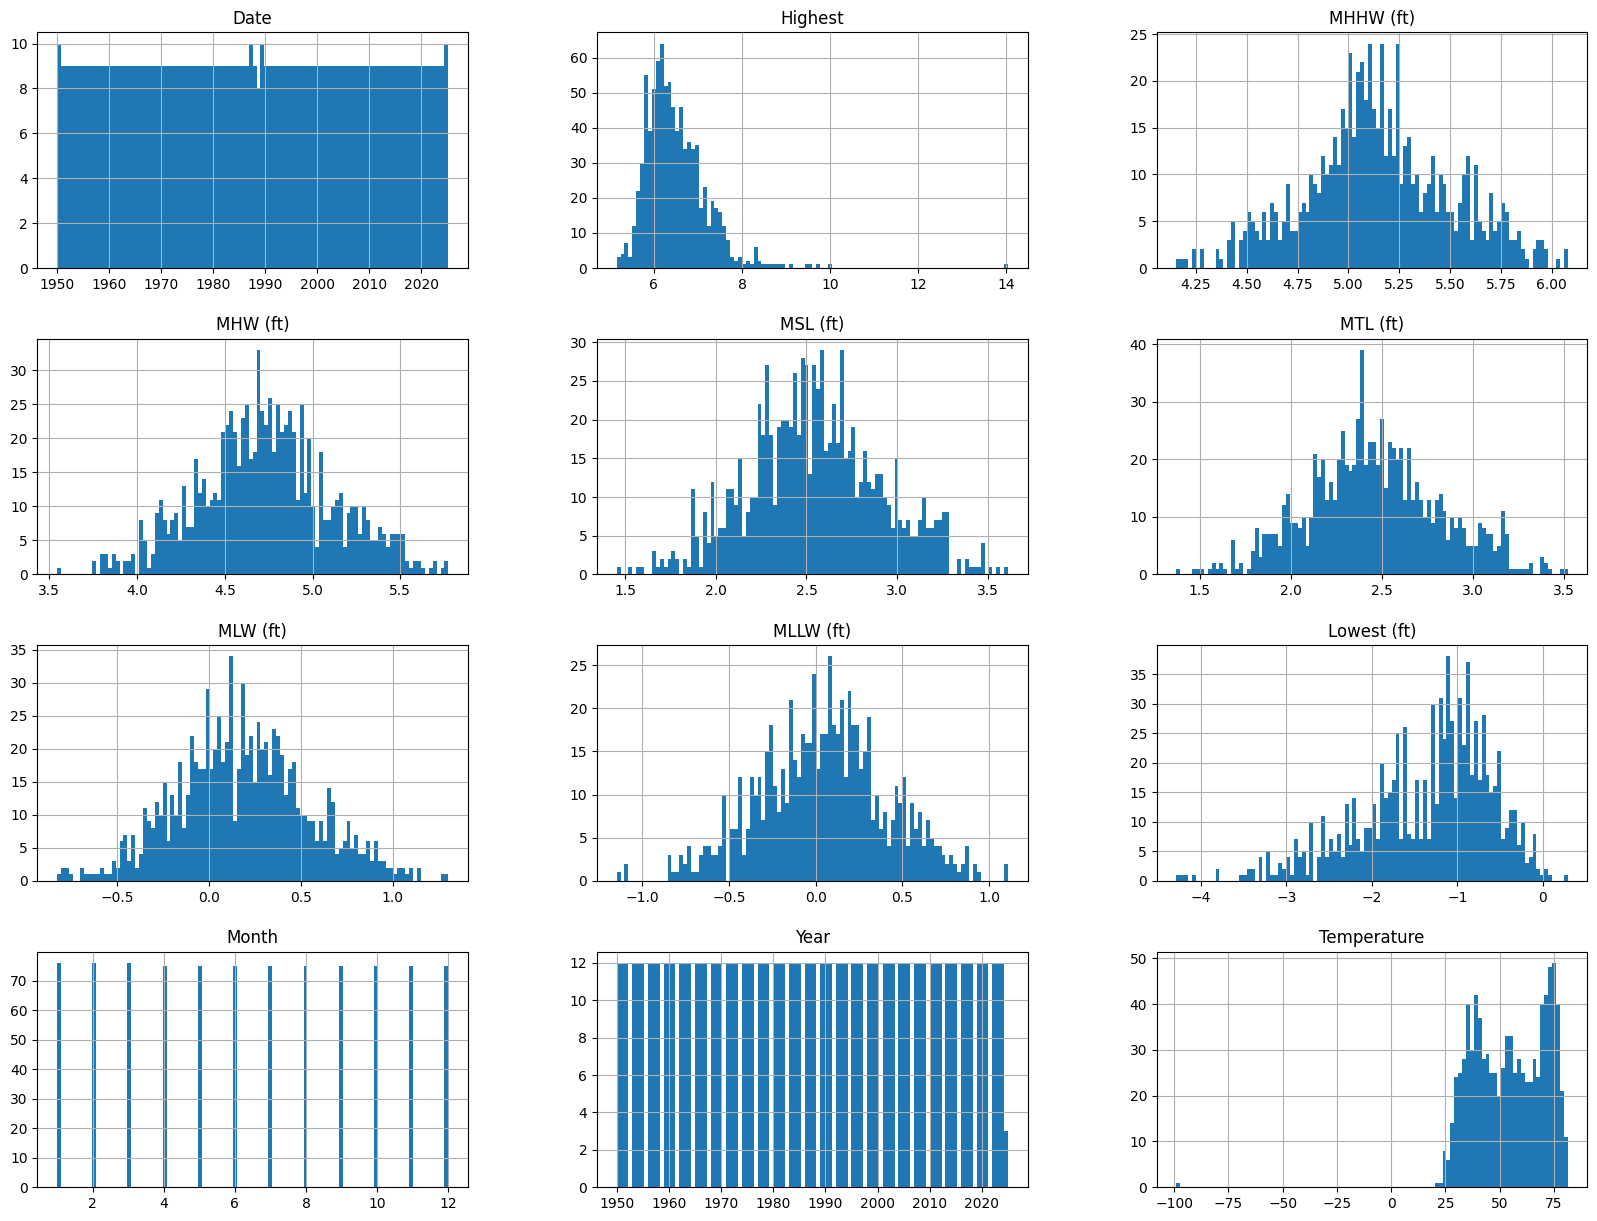

In [36]:
#histogram of numetrics
WL.hist(bins=100, figsize=(20,15))
plt.show()

In [37]:
#Cleaning the data
print(WL.isnull().sum())
print(WL.duplicated().sum())

Date             0
Highest         23
MHHW (ft)      192
MHW (ft)         0
MSL (ft)         0
MTL (ft)         0
MLW (ft)         0
MLLW (ft)      192
Lowest (ft)     23
Month            0
Year             0
Temperature      0
dtype: int64
0


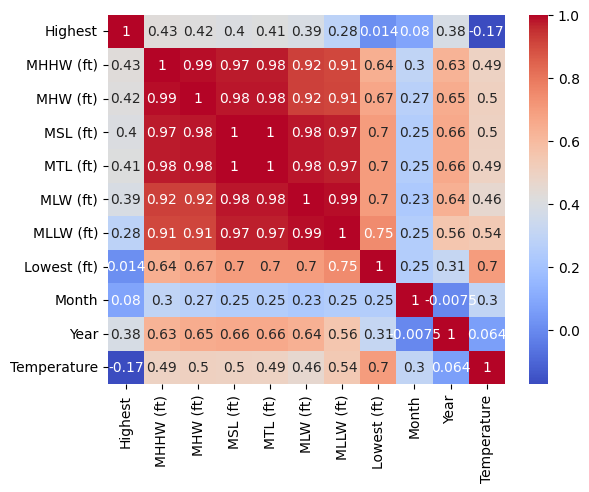

In [38]:
#Create heatmap of data coorolation excluding the date
corr = WL.drop('Date', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


AttributeError: module 'seaborn' has no attribute 'show'

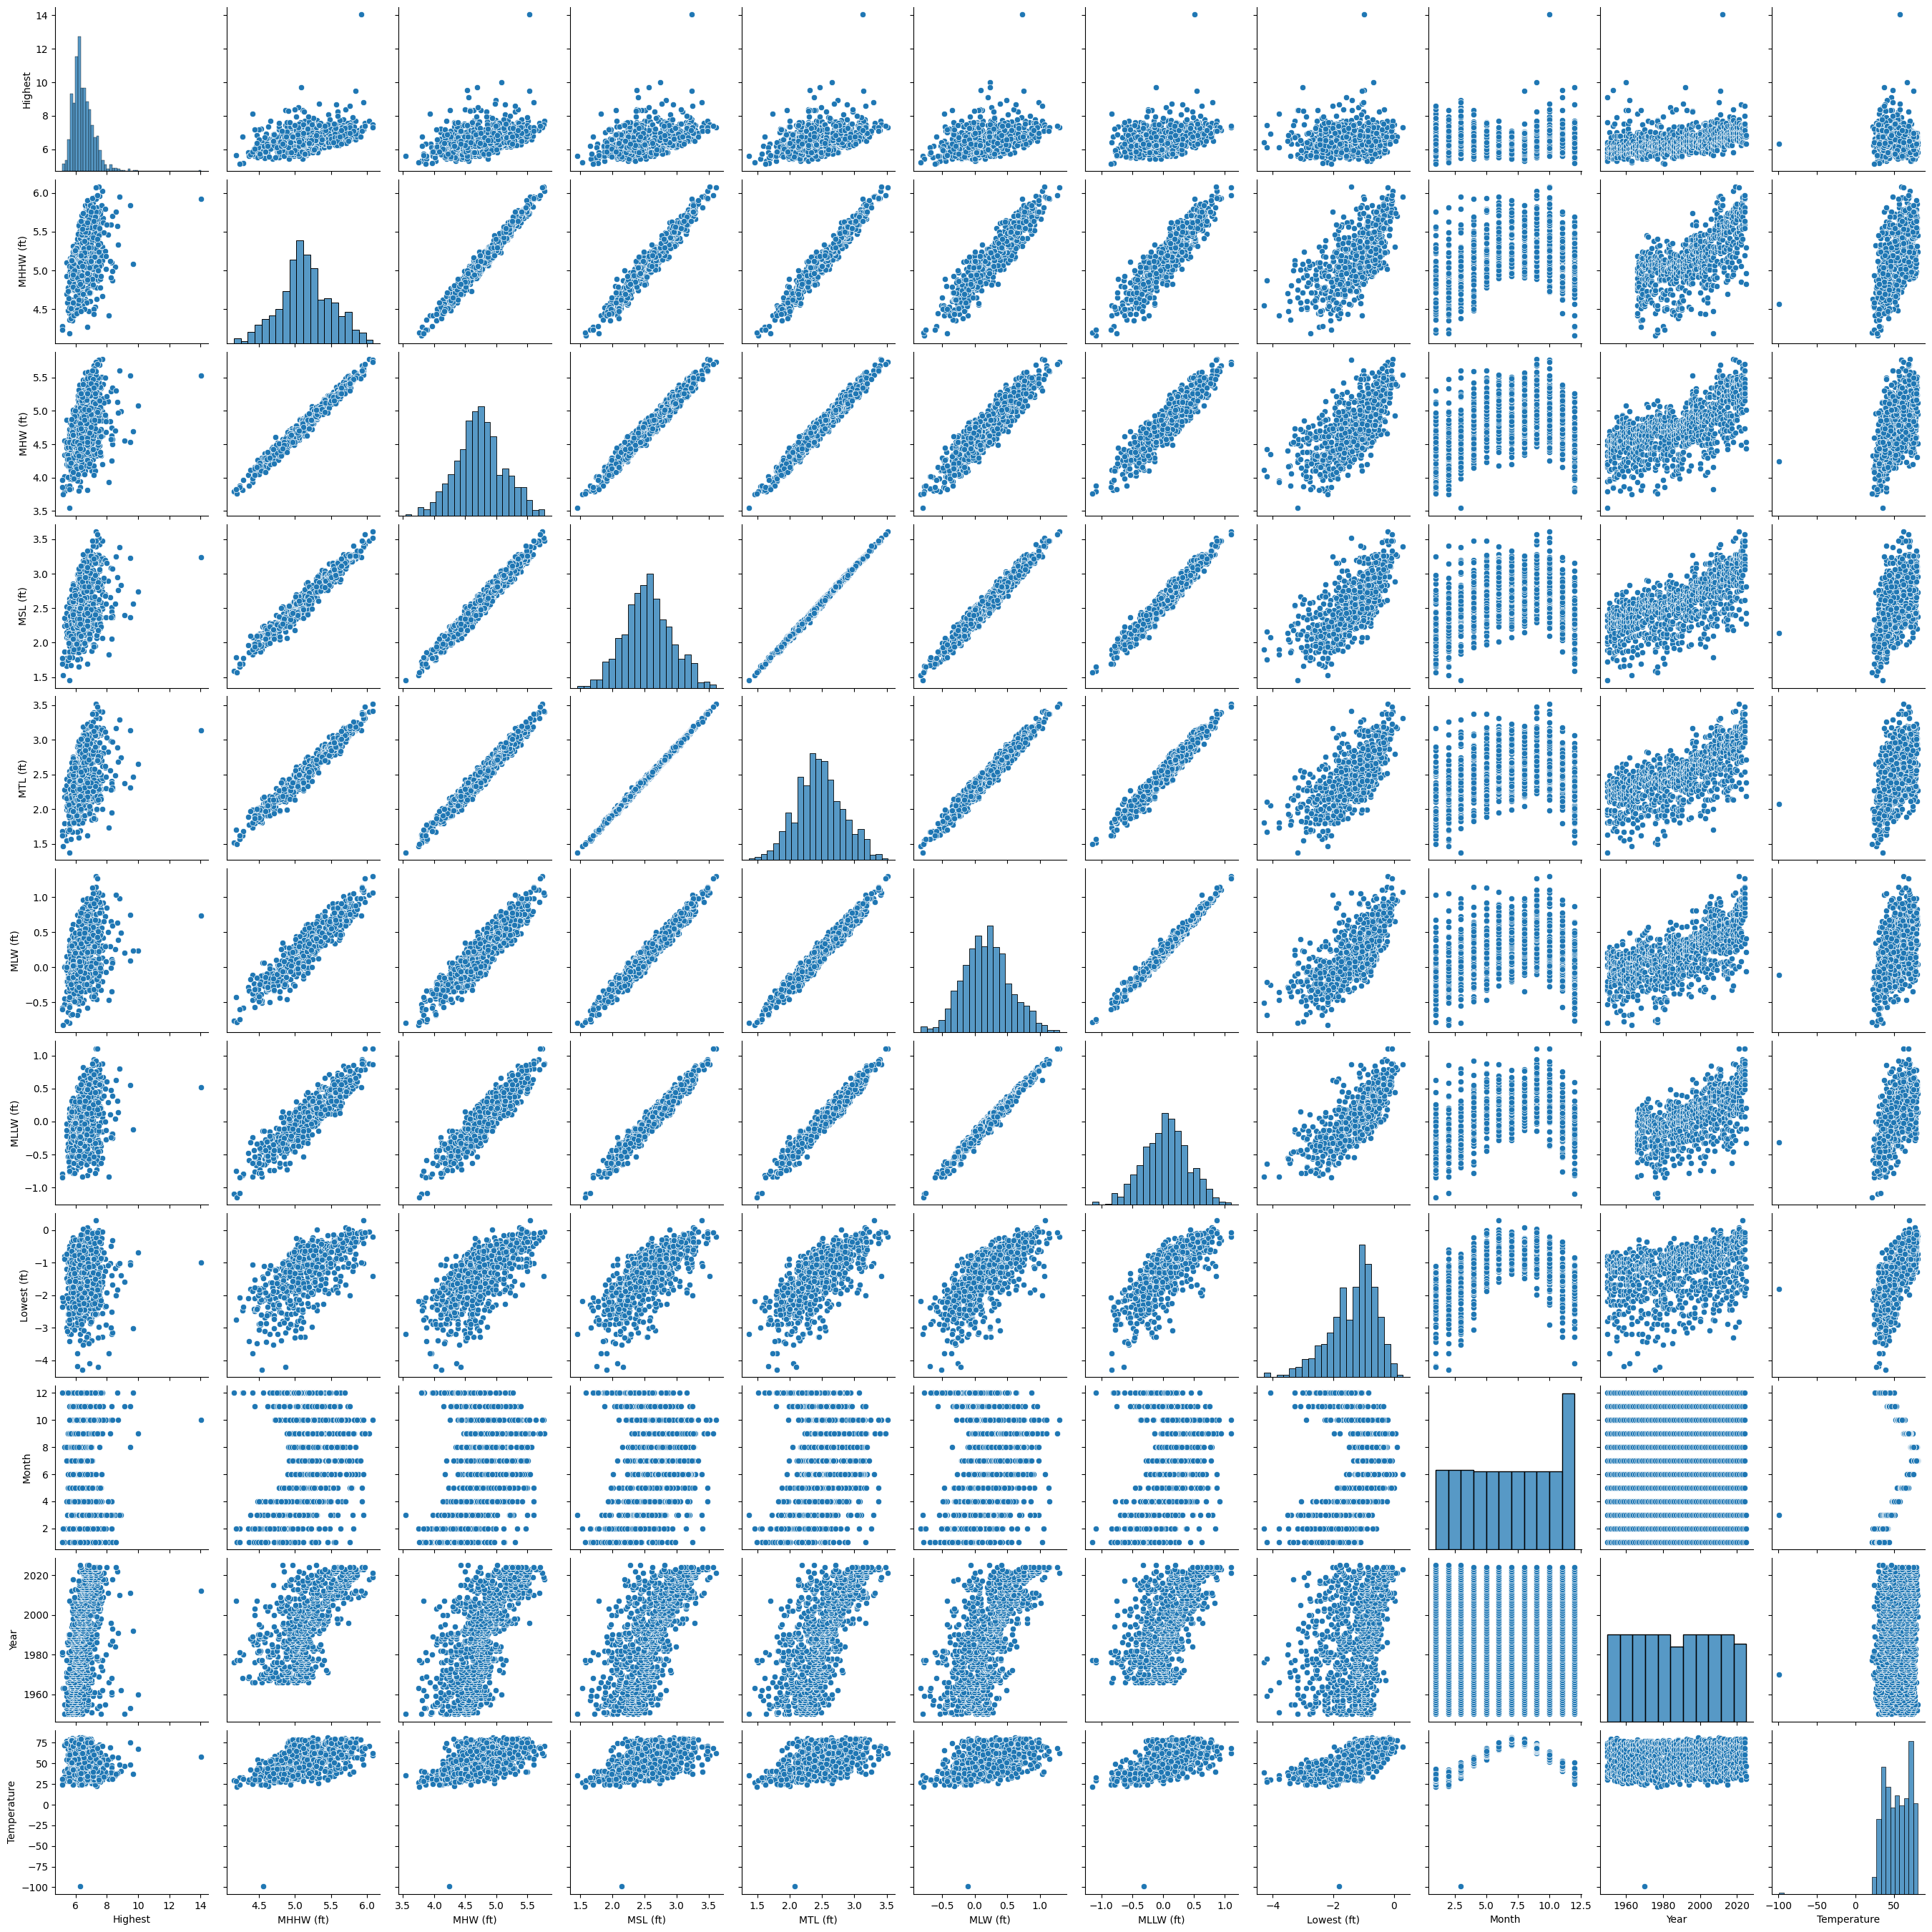

In [39]:
#Plotting the data in a matrix
sns.pairplot(WL)

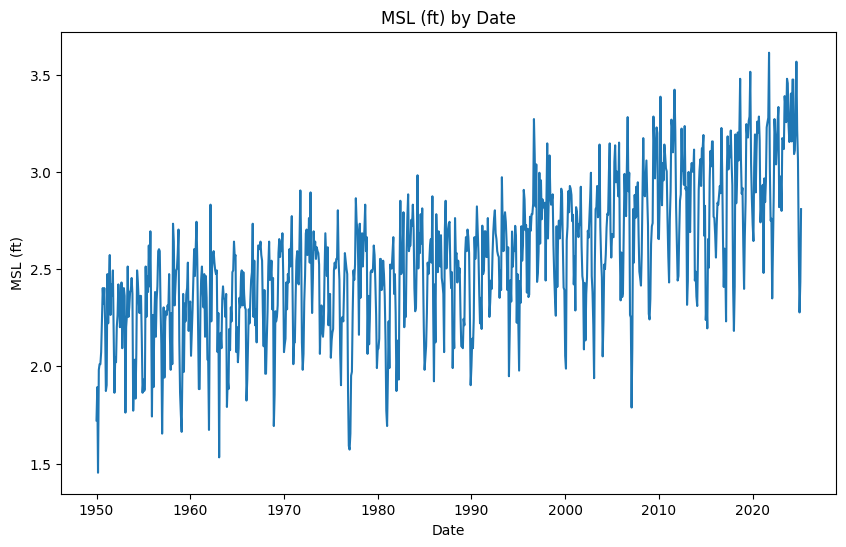

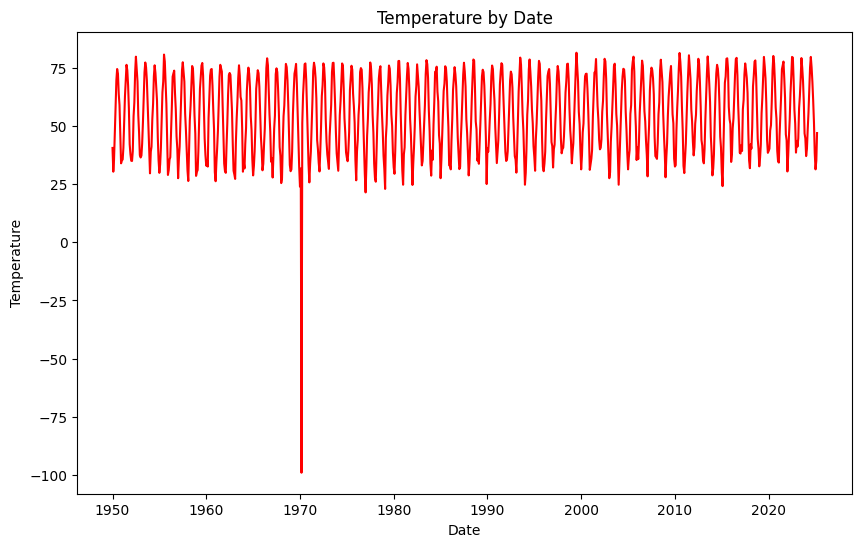

In [40]:
#plot MSL (ft) by itself in a line plot
plt.figure(figsize=(10, 6))
plt.plot(WL['Date'], WL['MSL (ft)'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('MSL (ft)')
plt.title('MSL (ft) by Date')
plt.show()

#plot Temperature by itself in a line plot
plt.figure(figsize=(10, 6))
plt.plot(WL['Date'], WL['Temperature'], linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature by Date')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


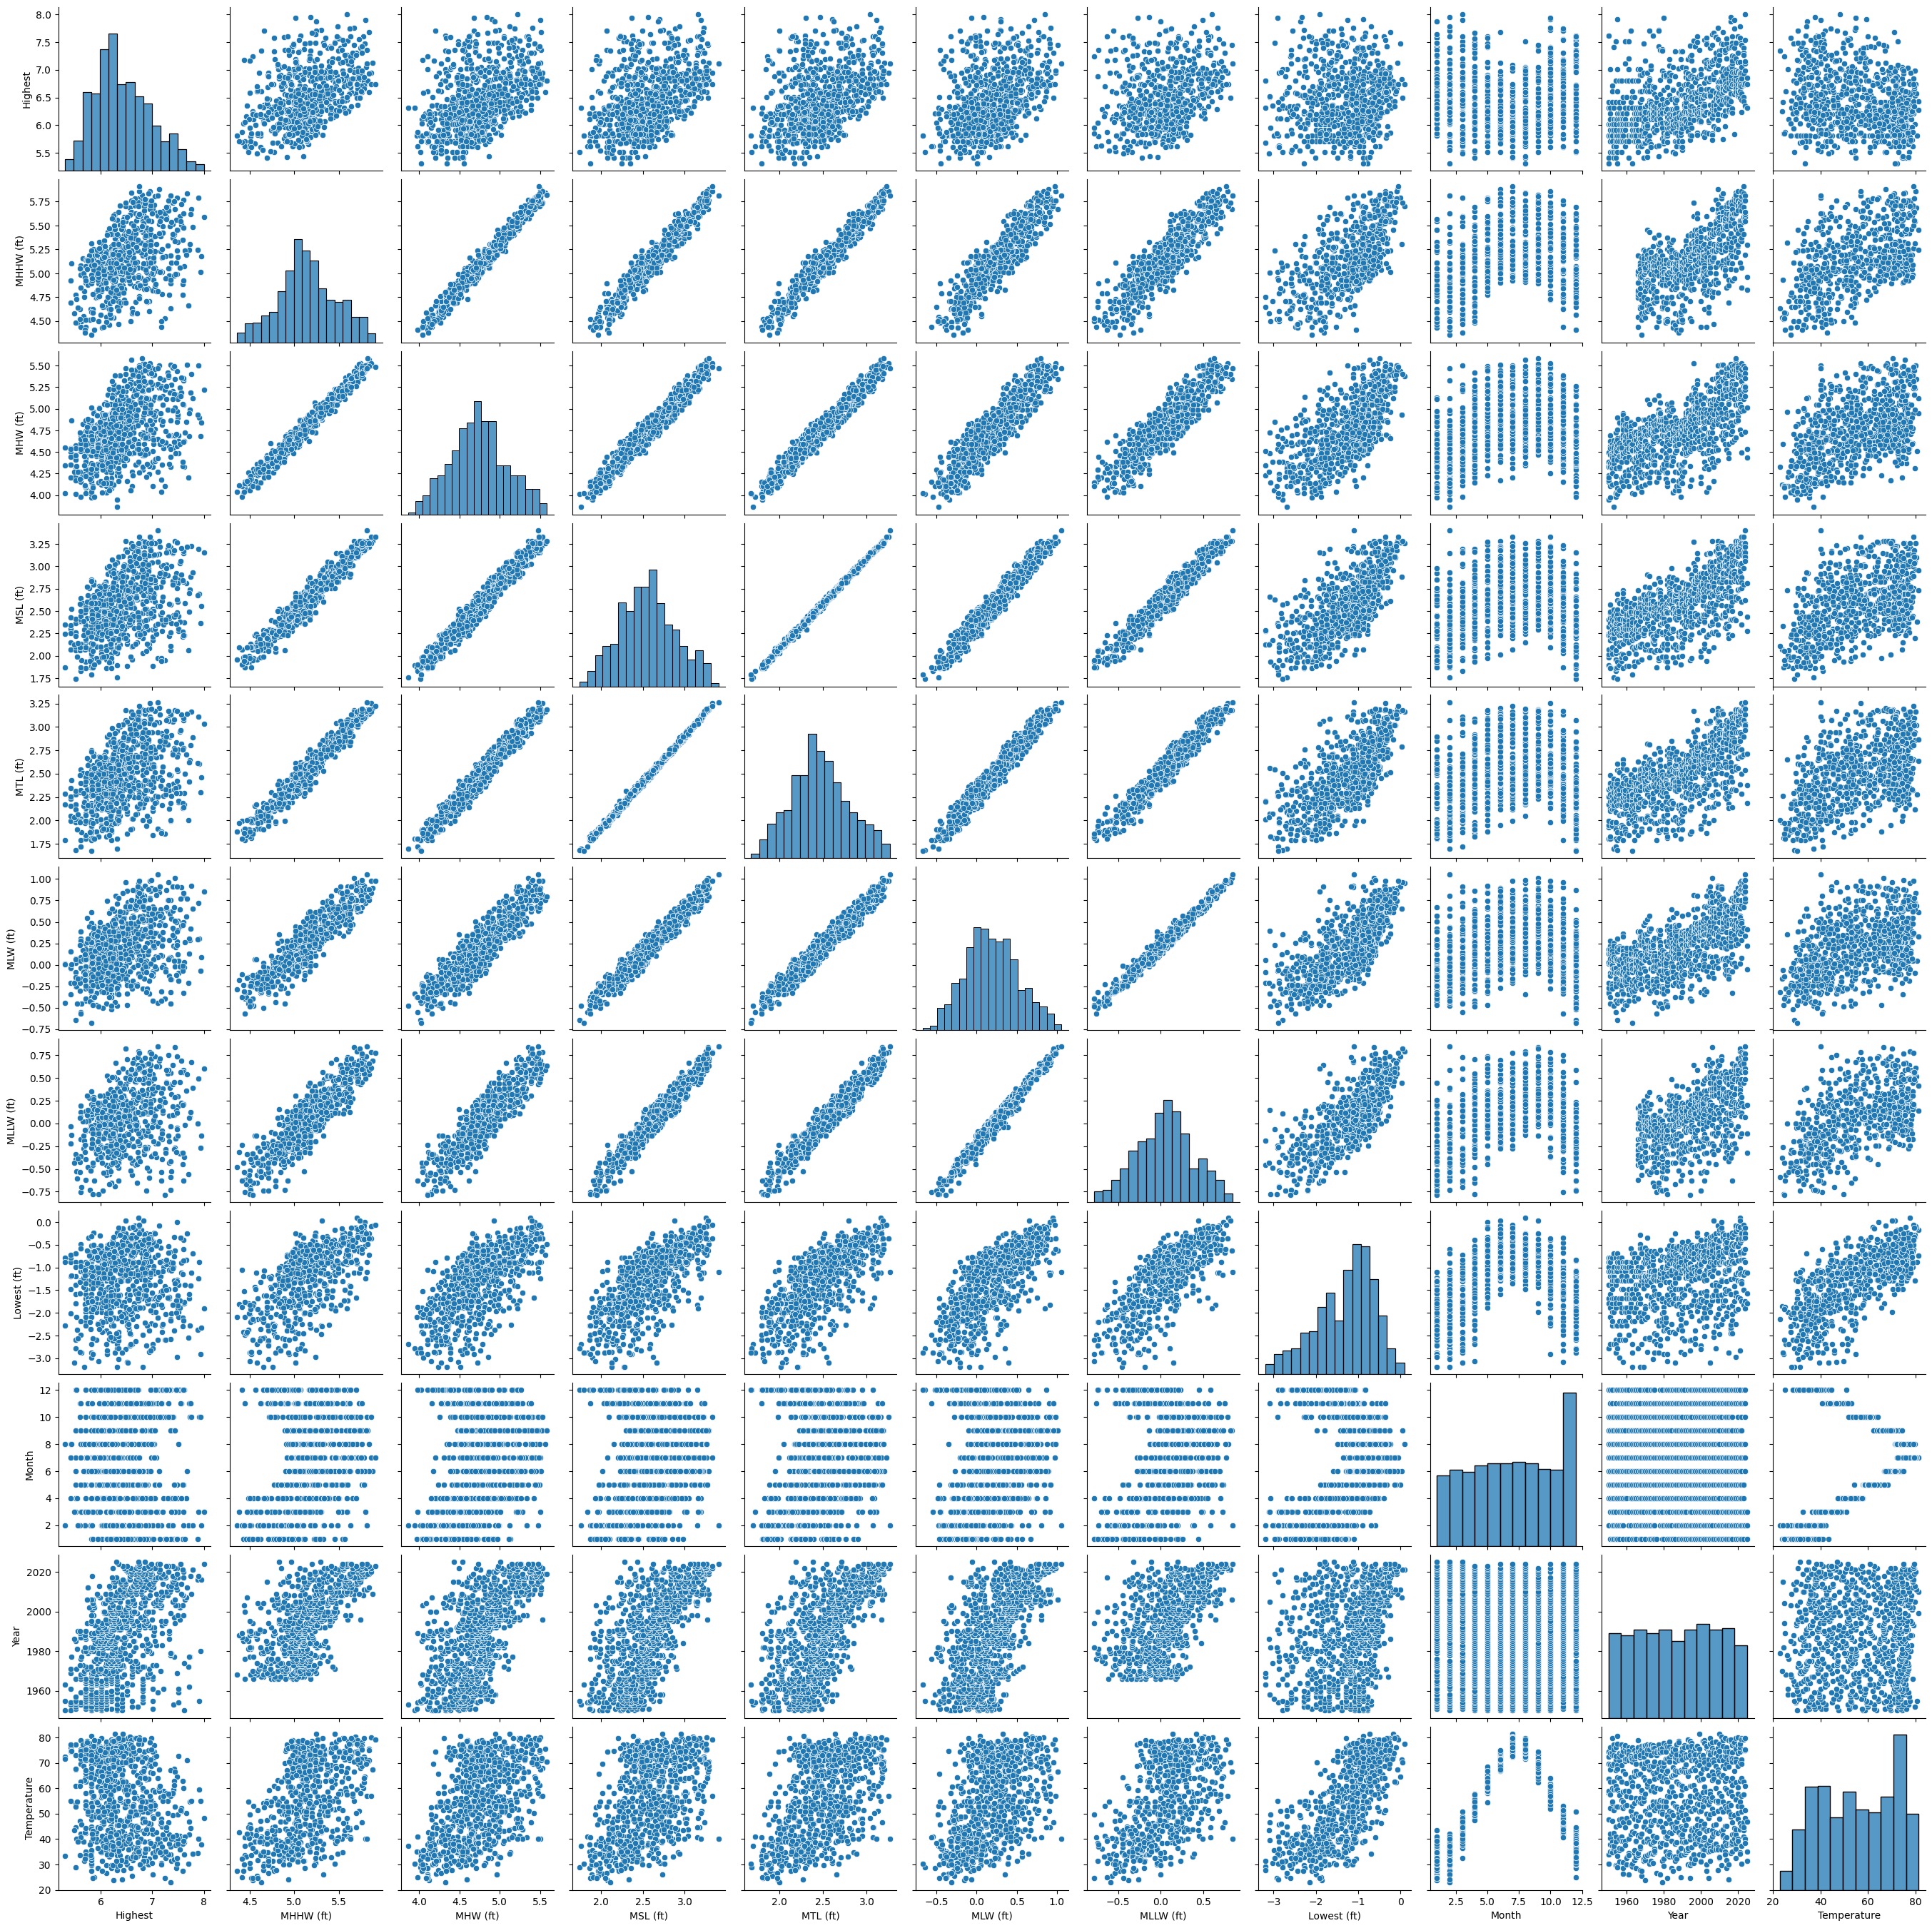

In [42]:
#remove data outliers from dataset
Q1 = WL.quantile(0.25)
Q3 = WL.quantile(0.75)
IQR = Q3 - Q1
WL = WL[~((WL < (Q1 - 1.5 * IQR)) |(WL > (Q3 + 1.5 * IQR))).any(axis=1)]

#plot dataset in matrix
sns.pairplot(WL)

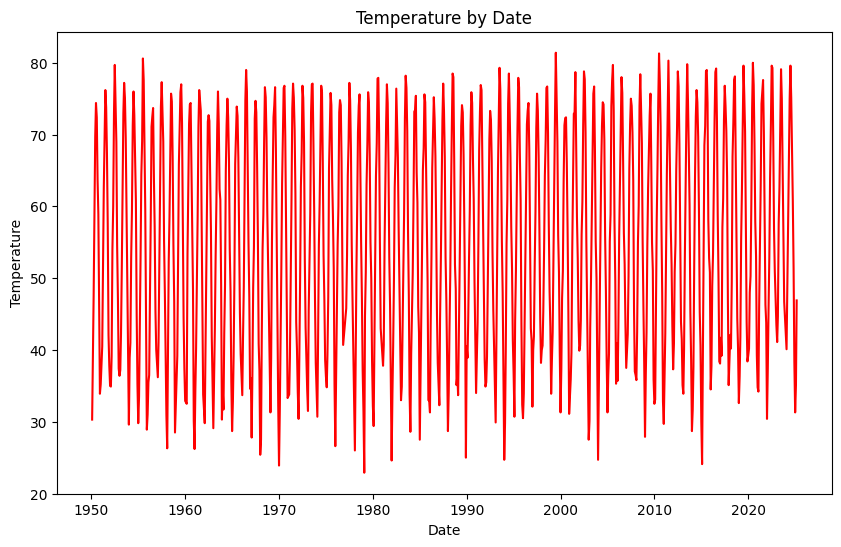

In [43]:
#Plot temperature again
plt.figure(figsize=(10, 6))
plt.plot(WL['Date'], WL['Temperature'], linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature by Date')
plt.show()

From the analysis of the data I noticed that there wasn't a significant degree of coorolation between temperature and the Highest sea level reported in a month, there was a significant degree of coorolation with the lowest level of sea level in any given year.

There is also an extreme outlier for the temperature data point for 1970/03/01.

I've also noticed that for temperature sea level, they go up and down according to the season; however, they are both increasing slightly as time increases

There also apprears to be a moderate coorolation between the year and most of the mean measurements of sea and tidal level, whereas no such coorolation exists for the month

The independant variables for this project will be **time** and **temperature**.

The dependant variables for this project will be **Highest sea level**, **MHHW**, **MHW**, **MSL**, **MTL**, **MLW**, **MLLW**, and **lowest sea level**.